# Linear Regression 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('ggplot')

In [10]:
mtcars=pd.read_csv("./data/mtcars/mtcars.csv")

<Axes: xlabel='wt', ylabel='mpg'>

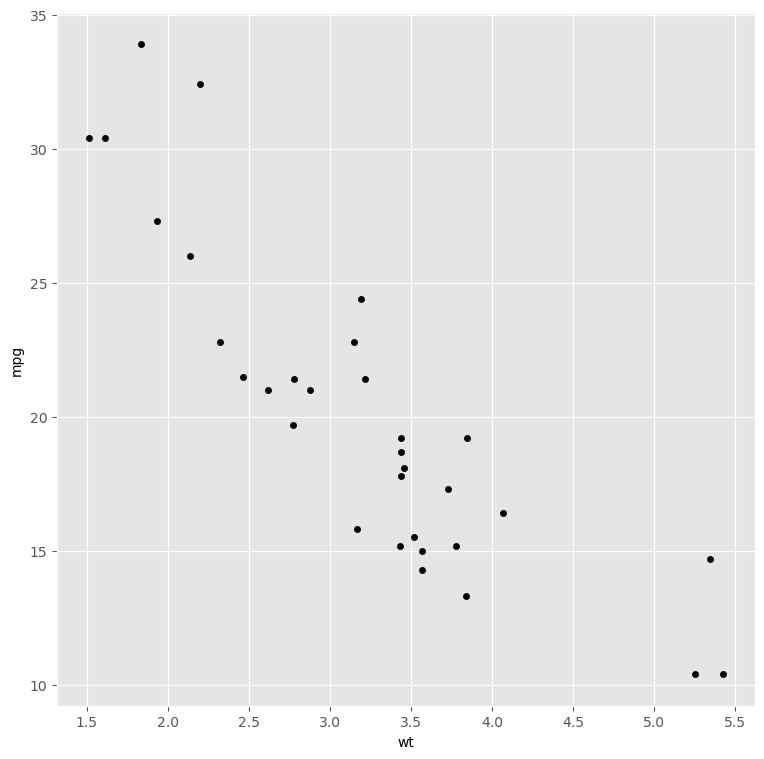

In [13]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black")

In [14]:
from sklearn import linear_model

In [15]:
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [18]:
regression_model=linear_model.LinearRegression()
regression_model.fit(X=pd.DataFrame(mtcars.wt),
                    y=mtcars.mpg)

LinearRegression()

In [20]:
print(regression_model.intercept_) #bias

37.28512616734204


In [21]:
print(regression_model.coef_)   #weight

[-5.34447157]


In [25]:
regression_model.score(X=pd.DataFrame(mtcars.wt),y=mtcars.mpg)

0.7528327936582646

In [26]:
train_predictions=regression_model.predict(pd.DataFrame(mtcars.wt))

In [28]:
train_predictions[:5]

array([23.28261065, 21.9197704 , 24.88595212, 20.10265006, 18.90014396])

In [29]:
mtcars.mpg[:5]

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

In [31]:
residuals=mtcars.mpg-train_predictions
residuals.describe()

count    3.200000e+01
mean    -4.996004e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

In [34]:
SSresidual=(residuals**2).sum()

In [35]:
SStotal=((mtcars.mpg-mtcars.mpg.mean())**2).sum()

In [36]:
#score= Rsquared
1-SSresidual/SStotal

0.7528327936582646

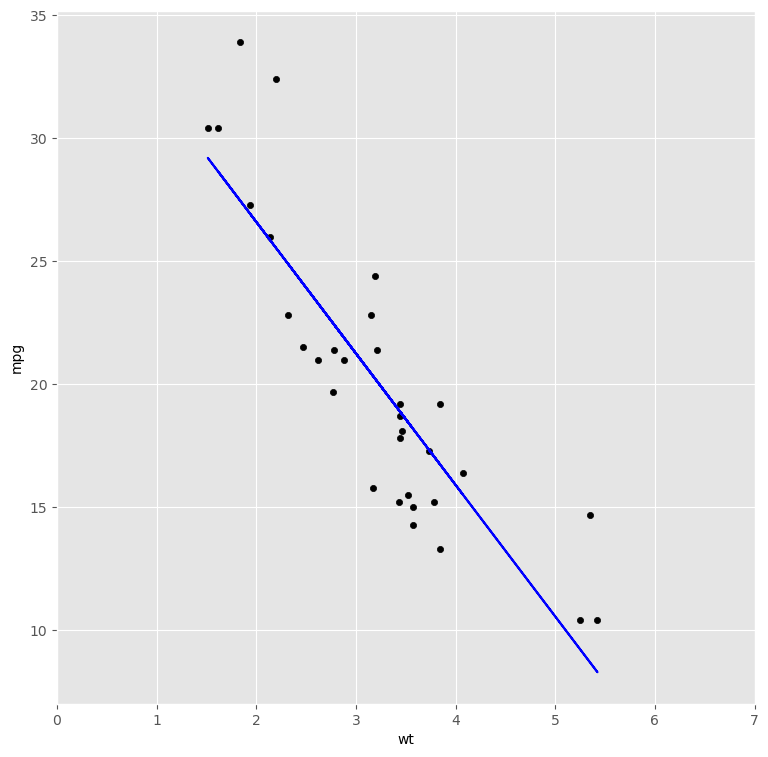

In [51]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim=(0,7))
plt.plot(mtcars.wt,
        train_predictions,
        color="blue")

((array([-2.02511189, -1.62590278, -1.38593914, -1.20666642, -1.05953591,
         -0.93235918, -0.81872017, -0.71478609, -0.6180591 , -0.52680137,
         -0.43973827, -0.35589149, -0.27447843, -0.19484777, -0.11643566,
         -0.03873405,  0.03873405,  0.11643566,  0.19484777,  0.27447843,
          0.35589149,  0.43973827,  0.52680137,  0.6180591 ,  0.71478609,
          0.81872017,  0.93235918,  1.05953591,  1.20666642,  1.38593914,
          1.62590278,  2.02511189]),
  array([-4.54315128, -3.90536265, -3.72686632, -3.46235533, -3.20536265,
         -2.97258623, -2.78093991, -2.61100374, -2.28261065, -2.08595212,
         -1.88302362, -1.10014396, -1.0274952 , -0.9197704 , -0.69325453,
         -0.20014396, -0.0502472 ,  0.152043  ,  0.29985604,  0.35642633,
          0.86687313,  1.17334959,  1.20105932,  1.29734994,  1.74619542,
          2.10328764,  2.34995929,  2.46436703,  4.16373815,  5.98107439,
          6.42197917,  6.87271129])),
 (3.0327797489458983, -4.743473967870

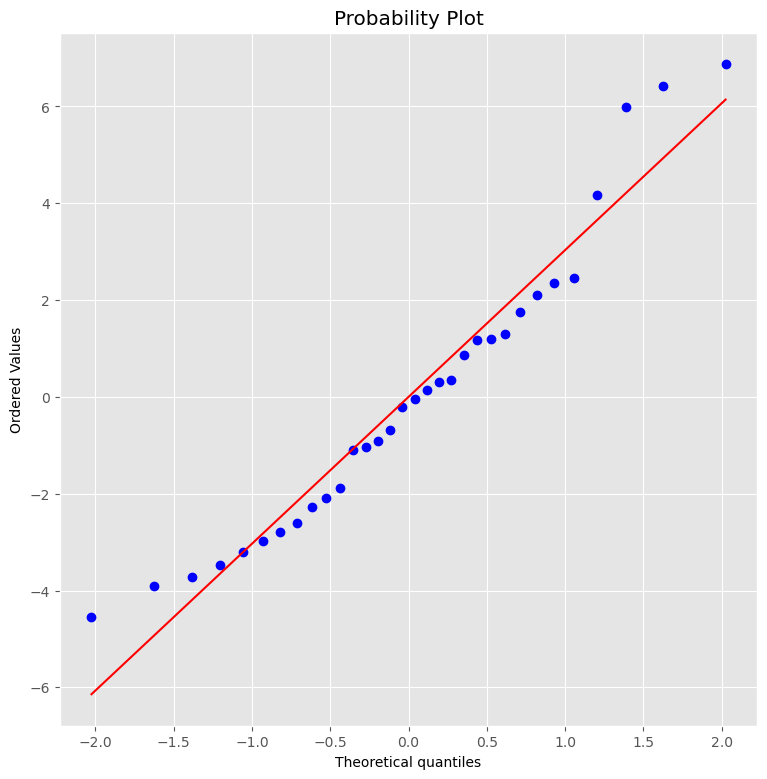

In [53]:
#qqplot
plt.figure(figsize=(9,9))
stats.probplot(residuals,dist="norm",plot=plt)

In [55]:
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(train_predictions,mtcars.mpg)**0.5
RMSE

2.949162685955028

## Polynomial Regression

In [59]:
poly_model=linear_model.LinearRegression()

predictors=pd.DataFrame([mtcars["wt"],mtcars["wt"]**2]).T
poly_model.fit(X=predictors,
              y=mtcars.mpg)
poly_model.intercept_

49.93081094945178

In [60]:
poly_model.coef_

array([-13.38033708,   1.17108689])

In [62]:
predictors.T

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
wt,2.6200,2.875000,2.3200,3.215000,3.4400,3.4600,3.5700,3.1900,3.1500,3.4400,...,3.435000,3.8400,3.845000,1.935000,2.1400,1.513000,3.1700,2.7700,3.5700,2.7800
wt,6.8644,8.265625,5.3824,10.336225,11.8336,11.9716,12.7449,10.1761,9.9225,11.8336,...,11.799225,14.7456,14.784025,3.744225,4.5796,2.289169,10.0489,7.6729,12.7449,7.7284


In [64]:
predictions=poly_model.predict(predictors)

C:\Users\manav\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


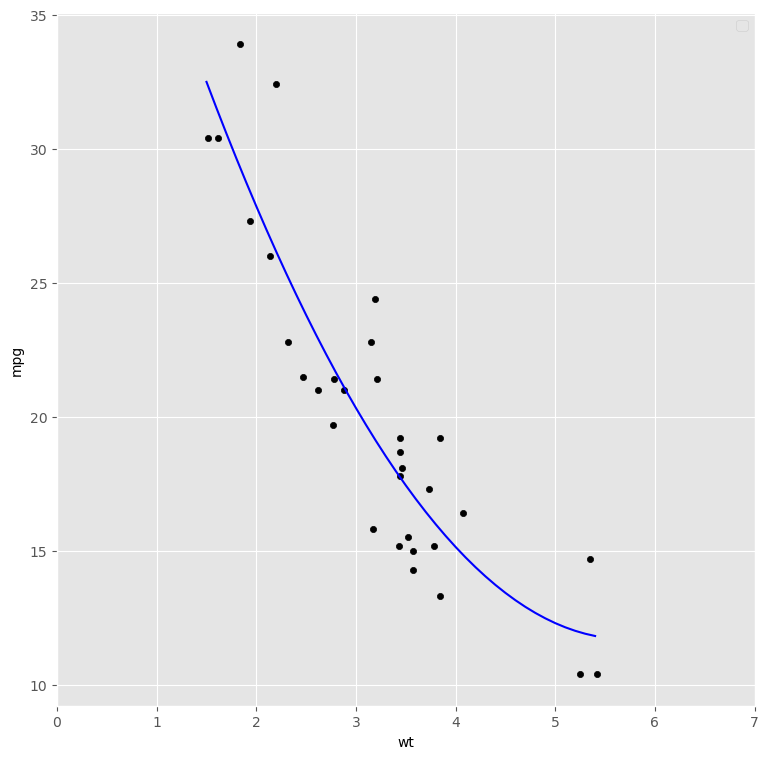

In [71]:
poly_line_range=np.arange(1.5,5.5,0.1)
poly_predictors=pd.DataFrame([poly_line_range,poly_line_range**2]).T
y_values=poly_model.predict(poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim=(0,7))
plt.plot(poly_line_range,
        y_values,
        color="blue")
plt.legend()

In [70]:
poly_model.score(X=predictors,y=mtcars.mpg)

0.8190613581384095

In [74]:
RMSE2=mean_squared_error(predictions,mtcars.mpg)**0.5
RMSE2

2.5233004724610786

## Multiple Regression 

In [75]:
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [76]:
multi_reg_model=linear_model.LinearRegression()
multi_reg_model.fit(X=mtcars.loc[:,["wt","hp"]],
                   y=mtcars.mpg)
print(multi_reg_model.intercept_,multi_reg_model.coef_)
multi_reg_model.score(X=mtcars.loc[:,["wt","hp"]],
                   y=mtcars.mpg)


37.227270116447215 [-3.87783074 -0.03177295]


0.8267854518827914

# Logistic Regression

In [78]:
 titanic_train=pd.read_csv("./data/titanic/train.csv")

In [79]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
char_cabin=titanic_train["Cabin"].astype(str)

In [84]:
type(char_cabin[1])

str

In [85]:
char_cabin

0       nan
1       C85
2       nan
3      C123
4       nan
       ... 
886     nan
887     B42
888     nan
889    C148
890     nan
Name: Cabin, Length: 891, dtype: object

In [86]:
new_cabin=np.array([cabin[0] for cabin in char_cabin])

In [87]:
titanic_train.Cabin=pd.Categorical(new_cabin)

In [91]:
titanic_train.Cabin

0      n
1      C
2      n
3      C
4      n
      ..
886    n
887    B
888    n
889    C
890    n
Name: Cabin, Length: 891, dtype: category
Categories (9, object): ['A', 'B', 'C', 'D', ..., 'F', 'G', 'T', 'n']

In [92]:
new_age_var=np.where(titanic_train.Age.isnull(),
                    28,
                    titanic_train.Age)

In [93]:
titanic_train.Age=new_age_var

<Axes: ylabel='Frequency'>

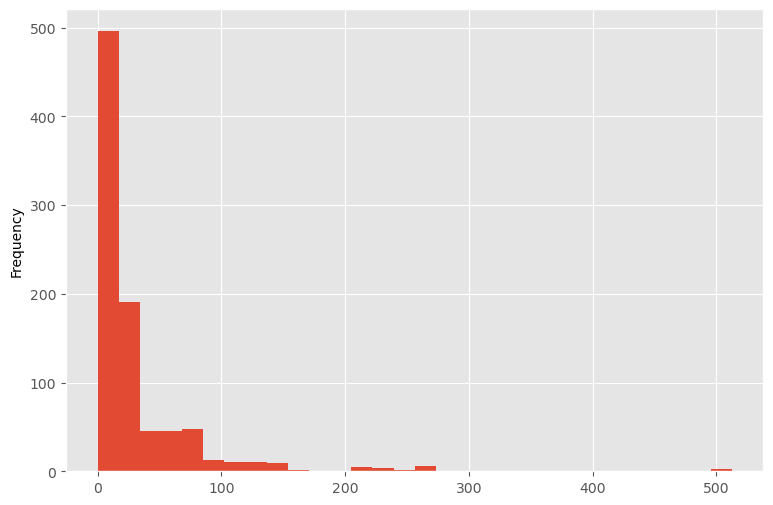

In [101]:
titanic_train.Fare.plot(kind="hist",
                       figsize=(9,6),
                       bins=30)

In [103]:
titanic_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [104]:
new_fare_var=np.where(titanic_train.Fare.isnull(),
                    50,
                    titanic_train.Age)

In [105]:
new_fare_var.mean()

29.36158249158249

In [107]:
titanic_train.Fare=new_fare_var

In [108]:
from sklearn import linear_model
from sklearn import preprocessing

In [110]:
label_encoder=preprocessing.LabelEncoder()
encoded_sex=label_encoder.fit_transform(titanic_train.Sex)

In [116]:
log_model=linear_model.LogisticRegression(solver='lbfgs')
log_model.fit(X=pd.DataFrame(encoded_sex),
             y=titanic_train.Survived)

LogisticRegression()

In [113]:
log_model.intercept_

array([1.01628767])

In [114]:
log_model.coef_

array([[-2.44597988]])

In [117]:
encoded_sex

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [119]:
pred=log_model.predict_proba(X=pd.DataFrame(encoded_sex))


In [120]:
pred

array([[0.80685335, 0.19314665],
       [0.26575115, 0.73424885],
       [0.26575115, 0.73424885],
       ...,
       [0.26575115, 0.73424885],
       [0.80685335, 0.19314665],
       [0.80685335, 0.19314665]])

In [121]:
pred=pd.DataFrame(pred)

In [122]:
pred

,0,1
0,0.806853,0.193147
1,0.265751,0.734249
2,0.265751,0.734249
3,0.265751,0.734249
4,0.806853,0.193147
...,...,...
886,0.806853,0.193147
887,0.265751,0.734249
888,0.265751,0.734249
889,0.806853,0.193147


In [123]:
pred.columns=["Death_prob","Survival_prob"]

In [124]:
pred

,Death_prob,Survival_prob
0,0.806853,0.193147
1,0.265751,0.734249
2,0.265751,0.734249
3,0.265751,0.734249
4,0.806853,0.193147
...,...,...
886,0.806853,0.193147
887,0.265751,0.734249
888,0.265751,0.734249
889,0.806853,0.193147


In [126]:
pd.crosstab(titanic_train.Sex,pred.loc[:,"Survival_prob"])

Survival_prob,0.193147,0.734249
Sex,,
female,0,314
male,577,0


In [128]:
encoded_class=label_encoder.fit_transform(titanic_train.Pclass)

In [129]:
encoded_cabin=label_encoder.fit_transform(titanic_train.Cabin)

In [131]:
pd.DataFrame(encoded_class)

,0
0,2
1,0
2,2
3,0
4,2
...,...
886,1
887,0
888,2
889,0


In [134]:
train_features=pd.DataFrame([encoded_class,
                            encoded_sex,
                            encoded_cabin,
                            titanic_train.Age]).T

In [135]:
train_features

,0,1,2,3
0,2.0,1.0,8.0,22.0
1,0.0,0.0,2.0,38.0
2,2.0,0.0,8.0,26.0
3,0.0,0.0,2.0,35.0
4,2.0,1.0,8.0,35.0
...,...,...,...,...
886,1.0,1.0,8.0,27.0
887,0.0,0.0,1.0,19.0
888,2.0,0.0,8.0,28.0
889,0.0,1.0,2.0,26.0


In [136]:
log_model.fit(X=train_features,
             y=titanic_train.Survived)

LogisticRegression()

In [137]:
log_model.intercept_

array([3.85818122])

In [138]:
log_model.coef_

array([[-0.93272694, -2.51826528, -0.09865307, -0.03339524]])

In [140]:
preds=log_model.predict_proba(X=train_features)

In [141]:
pred

,Death_prob,Survival_prob
0,0.806853,0.193147
1,0.265751,0.734249
2,0.265751,0.734249
3,0.265751,0.734249
4,0.806853,0.193147
...,...,...
886,0.806853,0.193147
887,0.265751,0.734249
888,0.265751,0.734249
889,0.806853,0.193147


In [144]:
preds=log_model.predict(X=train_features)

In [145]:
preds

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [146]:
pd.crosstab(preds,titanic_train["Survived"])

Survived,0,1
row_0,,
0,458,89
1,91,253


In [147]:
log_model.score(X=train_features,
               y=titanic_train.Survived)

0.797979797979798

## Accuracy Analysis

In [148]:
from sklearn import metrics 

In [149]:
metrics.confusion_matrix(y_true=titanic_train.Survived,
                         y_pred=preds)

array([[458,  91],
       [ 89, 253]], dtype=int64)

In [151]:
print(metrics.classification_report(y_true=titanic_train.Survived,
                             y_pred=preds))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       549
           1       0.74      0.74      0.74       342

    accuracy                           0.80       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



# Creating A Submission 

In [157]:
#Read and prepare test data
titanic_test = pd.read_csv("./data/titanic/test.csv")    # Read the data

char_cabin = titanic_test["Cabin"].astype(str)     # Convert cabin to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

titanic_test["Cabin"] = pd.Categorical(new_Cabin)  # Save the new cabin var

# Impute median Age for NA Age values
new_age_var = np.where(titanic_test["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_test["Age"])      # Value if check is false

titanic_test["Age"] = new_age_var 

In [163]:
# Convert test variables to match model features
encoded_sex = label_encoder.fit_transform(titanic_test["Sex"])
encoded_class = label_encoder.fit_transform(titanic_test["Pclass"])
encoded_cabin = label_encoder.fit_transform(titanic_test["Cabin"])

test_features = pd.DataFrame([encoded_class,
                              encoded_cabin,
                              encoded_sex,
                              titanic_test["Age"]]).T

In [168]:
# Convert test variables to match model features
encoded_sex = label_encoder.fit_transform(titanic_test["Sex"])
encoded_class = label_encoder.fit_transform(titanic_test["Pclass"])
encoded_cabin = label_encoder.fit_transform(titanic_test["Cabin"])

test_features = pd.DataFrame([encoded_class,
                              encoded_cabin,
                              encoded_sex,
                              titanic_test["Age"]]).T

In [169]:
# Make test set predictions
test_preds = log_model.predict(X=test_features)

# Create a submission for Kaggle
submission = pd.DataFrame({"PassengerId":titanic_test["PassengerId"],
                           "Survived":test_preds})

# Save submission to CSV
submission.to_csv("./submissions/titanic/titanic_logreg_submission.csv",
                 index=False)       # Do not save index values

#  Decision Trees

In [170]:
from sklearn import tree

In [178]:
titanic_train = pd.read_csv("./data/titanic/train.csv")    # Read the data

# Impute median Age for NA Age values
new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_train["Age"])     # Value if check is false

titanic_train["Age"] = new_age_var 


In [179]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert Sex variable to numeric
encoded_sex = label_encoder.fit_transform(titanic_train["Sex"])

# Initialize model
tree_model = tree.DecisionTreeClassifier()

# Train the model
tree_model.fit(X = pd.DataFrame(encoded_sex), 
               y = titanic_train["Survived"])

DecisionTreeClassifier()

In [180]:
tree_model.score(X = pd.DataFrame(encoded_sex), 
               y = titanic_train["Survived"])

0.7867564534231201

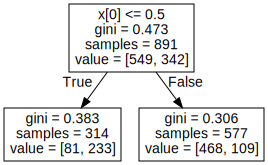

In [185]:
import graphviz

dot_data=tree.export_graphviz(tree_model,out_file=None)
graph=graphviz.Source(dot_data)
graph


In [203]:
preds=tree_model.predict_proba(X=pd.DataFrame(encoded_sex))

In [204]:
preds

array([[0.81109185, 0.18890815],
       [0.25796178, 0.74203822],
       [0.25796178, 0.74203822],
       ...,
       [0.25796178, 0.74203822],
       [0.81109185, 0.18890815],
       [0.81109185, 0.18890815]])

In [207]:
female=preds[titanic_train["Sex"]=="female"][0][1]

In [208]:
female

0.7420382165605095

In [209]:
male=preds[titanic_train["Sex"]=="male"][0][1]

In [210]:
male

0.18890814558058924

In [211]:
predictors=pd.DataFrame([titanic_train["Pclass"],encoded_sex]).T

In [212]:
tree_model.fit(X=predictors,y=titanic_train.Survived)

DecisionTreeClassifier()

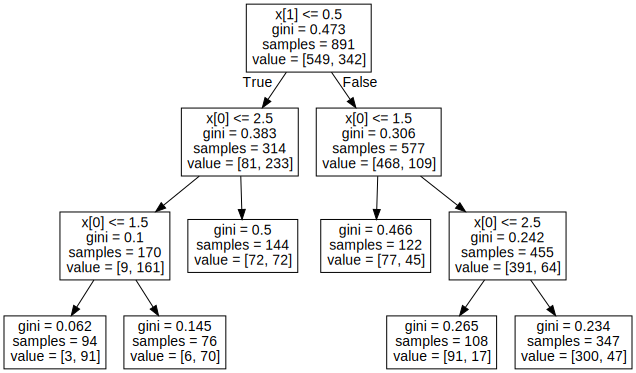

In [213]:
dot_data=tree.export_graphviz(tree_model,out_file=None)
graph=graphviz.Source(dot_data)
graph

In [217]:
preds=tree_model.predict_proba(X=predictors)
pd.crosstab(preds[:,0],columns=[titanic_train["Pclass"],titanic_train["Sex"]])

Pclass        1           2           3     
Sex      female male female male female male
row_0                                       
0.031915     94    0      0    0      0    0
0.078947      0    0     76    0      0    0
0.500000      0    0      0    0    144    0
0.631148      0  122      0    0      0    0
0.842593      0    0      0  108      0    0
0.864553      0    0      0    0      0  347

In [219]:
predictions=tree_model.predict(X=predictors)

In [221]:
tree_model.score(X=predictors,
                              y=titanic_train.Survived)

0.7867564534231201

# Random Forests

In [224]:
titanic_train=pd.read_csv("./data/titanic/train.csv")

In [227]:
from sklearn.impute import SimpleImputer

In [228]:
a=SimpleImputer(missing_values=np.nan,strategy="median")

In [232]:
a.fit(pd.DataFrame(titanic_train.Age))

SimpleImputer()

In [234]:
titanic_train.Age=a.transform(pd.DataFrame(titanic_train.Age))

<Axes: ylabel='Frequency'>

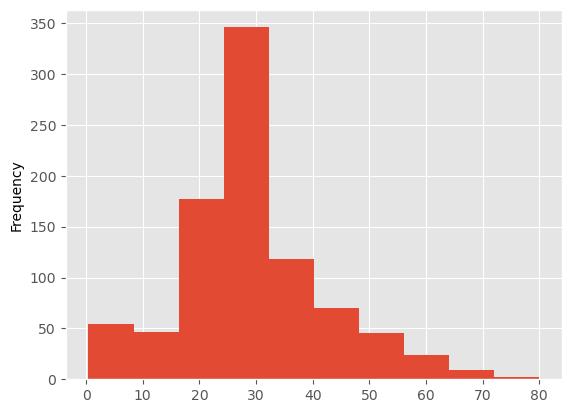

In [236]:
titanic_train.Age.plot(kind="hist")

In [239]:
from sklearn import preprocessing

In [240]:
from sklearn.ensemble import RandomForestClassifier

In [241]:
label_encoder=preprocessing.LabelEncoder()

In [247]:
titanic_train.Sex=label_encoder.fit_transform(titanic_train.Sex)

In [248]:
np.random.seed(12)

In [249]:
rf_model=RandomForestClassifier(n_estimators=1000,
                               max_features=2,
                               oob_score=True)
features=["Sex","Pclass","SibSp","Age","Fare"]
rf_model.fit(X=titanic_train[features],
           y=titanic_train["Survived"])

RandomForestClassifier(max_features=2, n_estimators=1000, oob_score=True)

In [250]:
rf_model.oob_score_

0.8181818181818182

In [252]:
for feature,importance in zip(features,rf_model.feature_importances_):
    print(feature,importance)

Sex 0.27156045141517215
Pclass 0.09068522067354125
SibSp 0.04898759678951493
Age 0.2832901010917785
Fare 0.30547663002999326


## Submission for Competition

In [253]:
# Read and prepare test data
titanic_test = pd.read_csv("./data/titanic/test.csv")    # Read the data

# Impute median Age for NA Age values
new_age_var = np.where(titanic_test["Age"].isnull(),
                       28,                      
                       titanic_test["Age"])      

titanic_test["Age"] = new_age_var 

# Fill missing Fare with 50
new_fare_var = np.where(titanic_test["Fare"].isnull(),
                       50,                      
                       titanic_test["Fare"])      

titanic_test["Fare"] = new_fare_var 

# Convert some variables to numeric
titanic_test["Sex"] = label_encoder.fit_transform(titanic_test["Sex"])

# Make test set predictions
test_preds = rf_model.predict(X = titanic_test[features])

# Create a submission for Kaggle
submission = pd.DataFrame({"PassengerId":titanic_test["PassengerId"],
                           "Survived":test_preds})

# Save submission to CSV
submission.to_csv("./submissions/titanic/tutorial_randomForest_submission.csv", 
                  index=False)        # Do not save index values